**Hardware characteristics**

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Sep 14 01:50:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Import libraries for dataframe handle and for visualize data with matplotlib**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Upload data contained in a .csv**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads (1) (2).csv to Social_Network_Ads (1) (2).csv


In [4]:
dataset=pd.read_csv('Social_Network_Ads.csv')

**Set aspects of the visual theme for all matplotlib and seaborn plots**

This function changes the global defaults for all plots using the matplotlib rcParams system. The themeing is decomposed into several distinct sets of parameter values.

**Set the parameters that control the scaling of plot elements**

This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style. This is accomplished using the matplotlib rcParams system.

The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”, which are version of the notebook parameters scaled by different values. Font elements can also be scaled independently of (but relative to) the other values.

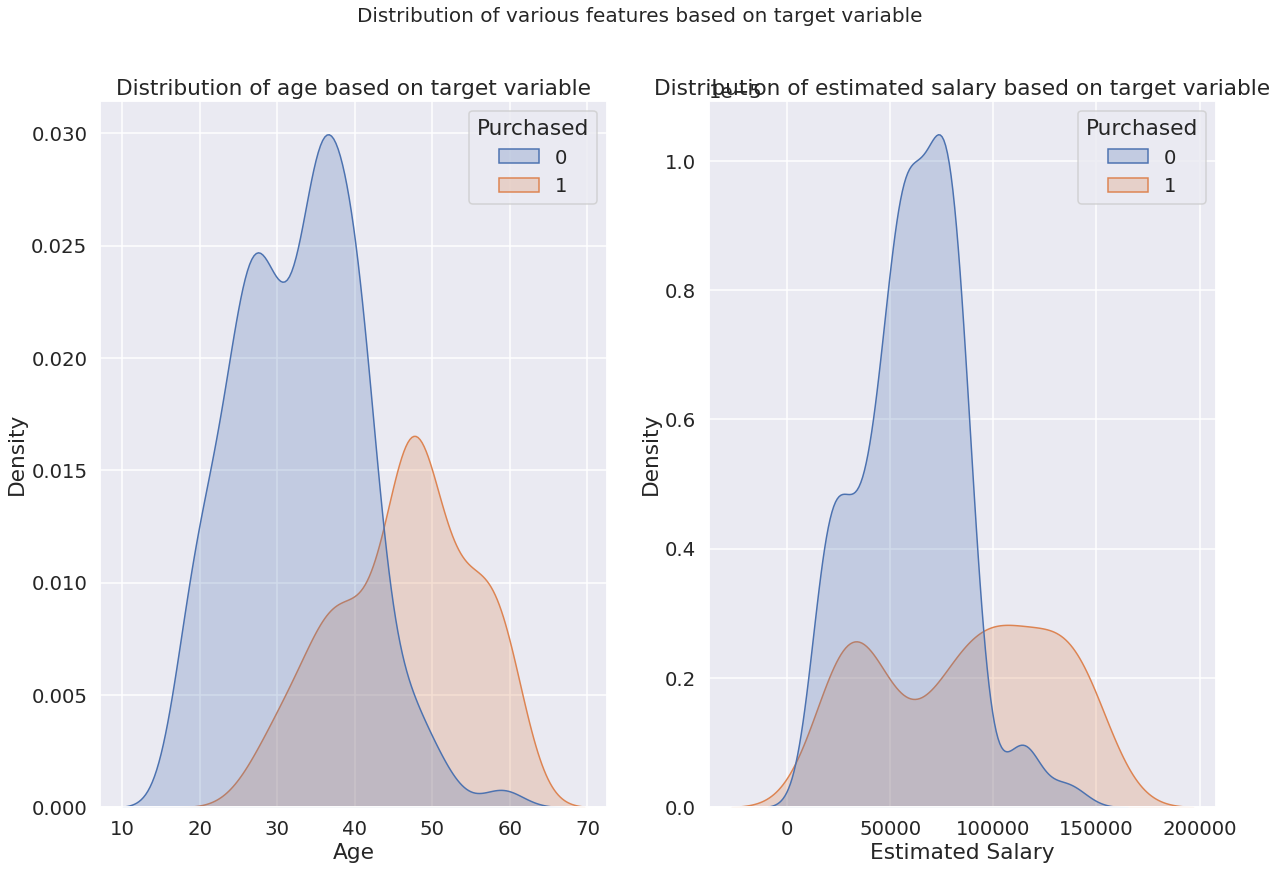

In [56]:
import seaborn as sns
sns.set()

sns.set_context('talk', font_scale= 1.2)
fig, ax = plt.subplots(1, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='Age', data= dataset, hue= 'Purchased', shade= True, ax= ax[0]) #palette="crest")
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.kdeplot(x ='EstimatedSalary', data= dataset, hue= 'Purchased', shade= True, ax= ax[1])
ax2.set(xlabel = 'Estimated Salary', title= 'Distribution of estimated salary based on target variable')

plt.show()

**See first 5 rows of dataset**

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Assign dataset entries (age and estimated salary)**

In [6]:
x=dataset.iloc[:,[2,3]].values

Assign dataset outputs (purchased)

In [7]:
y=dataset.iloc[:,4].values

**Split arrays or matrices into random train and test subsets**

In [8]:
from sklearn.model_selection import train_test_split

**Create x_train, y_train, x_test, and y_test (train: 75% of data, test: 25% of data)**

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

**Standardize features by removing the mean and scaling to unit variance z = (x - u) / s** 

Where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False. The standard score of a sample is x.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics
from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes (GaussianNB)

In [14]:
gnb = GaussianNB()

**Fit Gaussian Naive Bayes according to x, y**

In [15]:
gnb.fit(x_train,y_train)

GaussianNB()

**Perform classification on an array of test vectors x**

In [16]:
y_pred_train=gnb.predict(x_train)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[174  15]
 [ 20  91]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


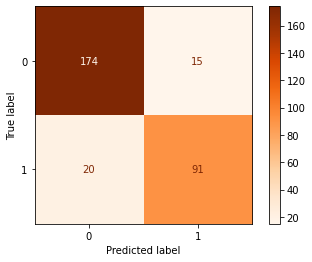

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_train, y_train, cmap=plt.cm.Oranges)
plt.show()

**Return the mean accuracy on the given train data and labels**

In [36]:
gnb.score(x_train,y_train)

0.8833333333333333

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       189
           1       0.86      0.82      0.84       111

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300



In [38]:
y_pred = gnb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


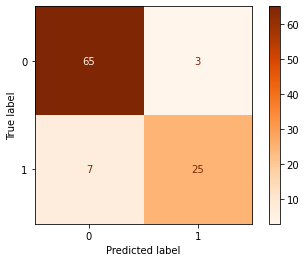

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_test, y_test, cmap=plt.cm.Oranges)
plt.show()

**Return the mean accuracy on the given test data and labels**

In [40]:
gnb.score(x_test,y_test)

0.9

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



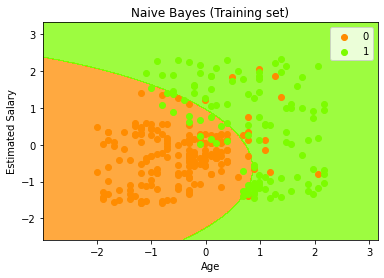

In [44]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap

X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkorange', 'lawngreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkorange', 'lawngreen'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

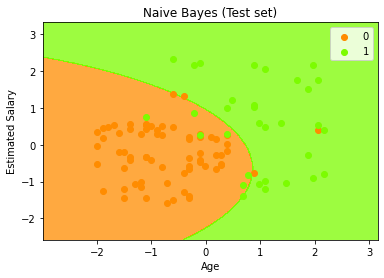

In [45]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkorange', 'lawngreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkorange', 'lawngreen'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
